# Understanding Factors in Animal Shelter Pet Adoption - Data Wrangling

In efforts to understand trends in pet adoption outcomes, the Austin Animal Center has provided data relating to the pets in their adoption center. Understanding this data and using it to model the factors that influence pet adoption could lead to recommendations that improve the performance of the center and help more pets find homes.

### Objective

In this project I will be exploring the dataset and using various data wrangling techniques to prepare the data via basic data wrangling techniques in order to prepare the data for analysis. This will include the following steps:

   1. Loading the data and extracting general info and structure
   2. Verifying that data is tidy
   3. Identifying & dealing with missing values/outliers

### 1. Data Info and Structure

First I will start by loading the required packages, as well as the dataset which can be found **[here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238)**

**Note:** This dataset is updated hourly, and was accessed on Sunday, December 12th 2017 at 19:00 UTC for this project.

In [39]:
# For working with dataframes and manipulation
import numpy as np
import pandas as pd

# Used to create graphics and plots
import matplotlib.pyplot as plt
import seaborn as sns

Instead of the raw data, I will be working with the data that was cleaned in "Data Wrangling - Pet Adoption"

In [31]:
# Load the dataset locally
data = pd.read_csv('data/Austin_Animal_Center_Outcomes.csv')

In [32]:
# Display number of entries and features in the data
print('# of entries in this dataset: {0}'.format(data.shape[0]))
print('# of features per entry: {0}'.format(data.shape[1]))

# of entries in this dataset: 76133
# of features per entry: 12


In [33]:
# Display general information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76133 entries, 0 to 76132
Data columns (total 12 columns):
Animal ID           76133 non-null object
Name                52741 non-null object
DateTime            76133 non-null object
MonthYear           76133 non-null object
Date of Birth       76133 non-null object
Outcome Type        76123 non-null object
Outcome Subtype     35280 non-null object
Animal Type         76133 non-null object
Sex upon Outcome    76131 non-null object
Age upon Outcome    76123 non-null object
Breed               76133 non-null object
Color               76133 non-null object
dtypes: object(12)
memory usage: 7.0+ MB


There are a few details to mention here. Firstly we can see that within our 12 columns, there seem to be some missing entries in several of the columns, which may need to be addressed later on. In addition, all of the row types are classified as 'object', which can most likely be handled more efficiently if we are able to parse out specific types such as the 'DateTime' column. This column can be handled with much more functionality if we are able to convert it to a Datetime object in our dataframe.

In order to get more information, we will preview the first few rows of the data.

In [34]:
# Display first 10 entries
data.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
1,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
2,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray
3,A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,NaN,Dog,Intact Female,1 year,Labrador Retriever/Jack Russell Terrier,Yellow
4,A750122,Happy Camper,05/24/2017 06:36:00 PM,05/24/2017 06:36:00 PM,04/08/2017,Transfer,Partner,Dog,Intact Male,1 month,Labrador Retriever Mix,Black
5,A756696,Shakti,09/01/2017 11:23:00 AM,09/01/2017 11:23:00 AM,08/24/2014,Return to Owner,NaN,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Blue/White
6,A684346,NaN,07/22/2014 04:04:00 PM,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby
7,A666430,Lucy,11/07/2013 11:47:00 AM,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown
8,A675708,*Johnny,06/03/2014 02:20:00 PM,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White
9,A680386,Monday,06/15/2014 03:50:00 PM,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White


This table gives a much better look at what is going on in the data. Starting from the leftmost column are the following observations:

   1. **Animal ID** - This is a unique identifier for each entry that is a letter combined with a number. This seems well-formatted.
     
   2. **Name** - Some entries are missing here, and there are also some entries with asterisks before the names (e.g. \*Pebbles, \*Johnny). It will be useful if we can find out the meaning of the asterisk in this field.  
     
   3. **DateTime** and **MonthYear** - These columns look like datetime objects, but they look identical for the entries we see. If we verify that the columns are identical, we may be better served removing one.
     
   4. **Date of Birth** - This year may also be converted into a datetime object, so that we can perform time-series analysis with this information.
     
   5. **Outcome Type** - There are several categories in this column, and we may be able to convert the entries into categories for easier handling.
     
   6. **Outcome Subtype** - This has many missing entries, and we only see categories for Euthanasia and Transfer corresponding outcome types. Depending on the number of subtypes for these types, it may be more efficient to integrate them into the outcome type category.
     
   7. **Animal Type** - In addition to cats and dogs, there is an 'Other' category here in the third entry, corresponding to a 'Raccoon Mix' breed of animal. With the small amount of types of animals, this column is likely to perform better as categorical values.
     
   8. **Age upon Outcome** - If we are able to convert this into a uniform value (e.g. age in months) we can work with these values as numbers which will make analyzing this data easier. It should also be noted that if we work with the Outcome DateTime and Date of Birth columns as datetime objects, columns like this can be generated by arithmetic operations.
     
   9. **Breed** and **Color** - These columns look well-formatted, but more investigation is needed in order to determine whether they will perform better as categorical values, or what additional ways they can be transformed in order to yield more information.
   
### 2. Data Cleaning

Before we start cleaning the data, we will look at the distribution of Animal Types that the Austin Animal Center works with.

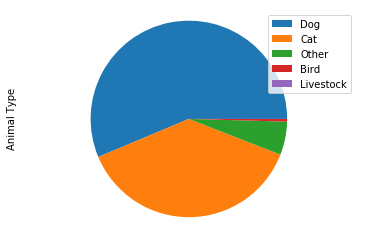

In [35]:
# Display number of occurences of animal types
data['Animal Type'].value_counts().plot(kind='pie', legend='Best', labels=None)
plt.axis('equal')
plt.show()

For this project we will only be considering cats and dogs, since they make up the majority of the activity at the animal center and thus require the most resources to shelter and find homes.

In [36]:
cat_data = data['Animal Type'] == 'Cat'
dog_data = data['Animal Type'] == 'Dog'
data = data[cat_data | dog_data]

Next let's look at the 'Name' column of the data. There are entries with asterisks and entries without. I have contacted the custodians of this dataset, and recieved the following reply:

    "...ASO Staff are supposed to be using the asterisk when they name a pet at their review – after they come in.  
    If they came in with a name, then no asterisk."
    
Since the asterisks only denotes whether or not the name of the animal was given before they arrived at the shelter it is not a factor of interest for this analysis so they will simply be removed

In [41]:
# Remove asterisks from names
data['Name'] = data['Name'].map(lambda x: str(x).lstrip('*'))


# Convert 'nan' strings back into NaN missing entries
data['Name'].replace('nan', np.nan);

Now the names will appear without asterisks.

Next up is the DateTime and MonthYear columns:

In [42]:
# Check if all values in the DateTime and MonthYear columns are identical
(data.DateTime == data.MonthYear).value_counts()

True    71626
dtype: int64

Since these columns are identical, we can remove the MonthYear column for now.

In [43]:
# Remove MonthYear columnn from the dataset
data = data.drop('MonthYear', axis=1);

Now we can convert the 'DateTime' column into a datetime format. Since 'Date of Birth' needs this as well, we will perform this action on both columns.

In [44]:
# Convert DateTime and Date of Birth into datetime format
data['DateTime'] =  pd.to_datetime(data['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'], format='%m/%d/%Y')

Next let's look at the outcome types and subtypes.

In [45]:
# Display number of occurences of outcome types
print('Outcome Types\n', data['Outcome Type'].value_counts())

# Display number of occurences of outcome subtypes
print('\nOutcome Subtypes\n', data['Outcome Subtype'].value_counts())

Outcome Types
 Adoption           31686
Transfer           22432
Return to Owner    13853
Euthanasia          2925
Died                 529
Rto-Adopt            121
Missing               45
Disposal              30
Name: Outcome Type, dtype: int64

Outcome Subtypes
 Partner                18669
Foster                  5369
SCRP                    3211
Suffering               1960
Snr                      542
Aggressive               504
Offsite                  360
In Kennel                297
In Foster                170
Rabies Risk              144
Behavior                 142
Medical                  116
At Vet                    54
Court/Investigation       18
Enroute                   18
In Surgery                15
Possible Theft             9
Barn                       3
Underage                   1
Name: Outcome Subtype, dtype: int64


For the outcome types we will mainly be investigating Adoption, Transfers and we will consider all other outcomes as undesirable. Euthanasia and Death must be accounted for so they will remain, but we will drop the small number of entries for animals that either went missing or were brought to the center for disposal.

In [46]:
# Remove 'Missing' and 'Disposal Entries
data = data[data['Outcome Type'] != 'Missing']
data = data[data['Outcome Type'] != 'Disposal']

Additionally, we will combine the rto-adopt entries into the class of adoption:

In [50]:
# Replace 'Rto-Adopt' entries with 'Adoption' class
data['Outcome Type'].replace('Rto-Adopt', 'Adoption');

This will help to significantly reduce the number of classes we are working with and thus improve the simplicity of the model.

Before moving on, we should convert our 'Outcome Type' column into categorical values, since we have a managable number of classes and it is our main feature of interest.

In [52]:
# Convert column to categorical entries
data['Outcome Type'] = pd.Categorical(data['Outcome Type'], ordered=False)

Similarly, the 'Animal Type' and 'Sex upon Outcome' columns should be considered as categorical features

In [53]:
# Display number of occurences of animal types
print('Animal Types\n', data['Animal Type'].value_counts())

# Display number of occurences of sex types
print('\nSex upon Outcome\n', data['Sex upon Outcome'].value_counts())

Animal Types
 Dog    42857
Cat    28694
Name: Animal Type, dtype: int64

Sex upon Outcome
 Neutered Male    26867
Spayed Female    24329
Intact Male       8937
Intact Female     8694
Unknown           2722
Name: Sex upon Outcome, dtype: int64


In [54]:
# Convert columns to categorical entries
data['Animal Type'] = pd.Categorical(data['Animal Type'], ordered=False)
data['Sex upon Outcome'] = pd.Categorical(data['Sex upon Outcome'], ordered=False)

As previously discussed, we can calculate the outcome age of any animal in the table (with a bit more granularity than we were provided) by converting this column into a timedelta format.

In [55]:
# Replace age column with calculation from birthdate and outcome date
data['Age upon Outcome'] = pd.to_timedelta(data['DateTime'] - data['Date of Birth'])

Next we consider the breed and color columns:

In [56]:
# Display number of occurences of breeds
print('Breeds\n', data['Breed'].value_counts())

# Display number of occurences of animal colors
print('\nColors\n', data['Color'].value_counts())

Breeds
 Domestic Shorthair Mix                           22768
Pit Bull Mix                                      5924
Chihuahua Shorthair Mix                           4590
Labrador Retriever Mix                            4444
Domestic Medium Hair Mix                          2252
German Shepherd Mix                               1839
Domestic Longhair Mix                             1197
Australian Cattle Dog Mix                         1030
Siamese Mix                                        980
Dachshund Mix                                      783
Boxer Mix                                          649
Miniature Poodle Mix                               625
Border Collie Mix                                  623
Catahoula Mix                                      459
Australian Shepherd Mix                            445
Rat Terrier Mix                                    438
Yorkshire Terrier Mix                              415
Siberian Husky Mix                                 405
Ja

We can see that the list of breeds and colors are very long and many categories only have one entry. There are a few options to take here. First, for breeds, we can cut down the number of entries by reducing the number of mixed breed entries of the format 'breed/breed'.

In [57]:
# Print the number of distinct breeds found in the data
print('# of unique breeds in the original dataset: {0}'.format(len(data['Breed'].unique())))

# Print the number of mixed breeds with the format 'breed/breed'
print('# of mixed breeds classified by "breed/breed": {0}'.format(len(data[data['Breed'].str.contains('/')]['Breed'].unique())))

# Iterate over the list to find and replace all mixed breeds with 'first_breed/second_breed' to format 'first_breed Mix'
mixed_breeds = []

for breed in data['Breed']:
    if '/' in breed:
        mixed_breeds.append(breed.split('/')[0] + ' Mix')
    else:
        mixed_breeds.append(breed)

# Check to see whether the result is of appropriate length
assert len(mixed_breeds) == len(data['Breed'])        

# Replace 'Breed' data with reduced category set
data['Breed'] = pd.Series(mixed_breeds)

# Display the number of distinct breeds after replacement
print('# of unique breeds after replacement: {0}'.format(len(data['Breed'].unique())))

# of unique breeds in the original dataset: 1948
# of mixed breeds classified by "breed/breed": 1551
# of unique breeds after replacement: 399


Now we have significantly reduced the number of breed categories in the dataset. For the 'Color' categories, we may lose some important information that can be useful. For example, do white and orange cats get adopted more often than white and black cats? In order to keep as much information as possible, but provide some simpler avenues for analysis I will split the 'Color' column into 'Primary Color' and 'Secondary Color' values for the animals.

In [58]:
# Print the number of distinct colors found in the dataset
print('# of unique colors in the original dataset: {0}'.format(len(data['Color'].unique())))

# Print the number of mixed breeds with the format 'color/color'
print('# of mixed colors classified by "color/color": {0}'.format(len(data[data['Color'].str.contains('/')]['Color'].unique())))

# Iterate over the list to find and replace all mixed breeds with 'first_breed/second_breed' to format 'first_breed Mix'
primary_colors = []
secondary_colors = []

for color in data['Color']:
    if '/' in color:
        primary_colors.append(color.split('/')[0])
        secondary_colors.append(color.split('/')[1])
    else:
        primary_colors.append(color)
        secondary_colors.append(None)

# Check to see whether the result is of appropriate length
assert len(primary_colors) == len(data['Color'])
assert len(secondary_colors) == len(data['Color'])

# Replace 'Color' with 'Primary Color' and 'Secondary Color' data
data = data.drop('Color', axis=1)
data['Primary Color'] = pd.Series(primary_colors)
data['Secondary Color'] = pd.Series(secondary_colors)

# Display the number of distinct colors after replacement
print('# of unique colors after replacement: {0}'.format(len(pd.Series(primary_colors).unique())))
print('# of unique colors after replacement: {0}'.format(len(pd.Series(secondary_colors).unique())))

# of unique colors in the original dataset: 491
# of mixed colors classified by "color/color": 435
# of unique colors after replacement: 57
# of unique colors after replacement: 51


Now the number of color categories has been reduced to about 10% of its original number. Now we can re-check the values for these categories.

In [59]:
# Display number of occurences of breeds
print('Breeds\n', data['Breed'].value_counts())

# Display number of occurences of animal colors
print('\nPrimary Colors\n', data['Primary Color'].value_counts())

Breeds
 Domestic Shorthair Mix              21362
Pit Bull Mix                         5892
Labrador Retriever Mix               5313
Chihuahua Shorthair Mix              4953
Domestic Medium Hair Mix             2146
German Shepherd Mix                  2103
Australian Cattle Dog Mix            1208
Domestic Longhair Mix                1136
Dachshund Mix                        1027
Siamese Mix                           928
Boxer Mix                             769
Border Collie Mix                     768
Miniature Poodle Mix                  693
Catahoula Mix                         549
Australian Shepherd Mix               521
Jack Russell Terrier Mix              510
Beagle Mix                            497
Yorkshire Terrier Mix                 497
Rat Terrier Mix                       483
Miniature Schnauzer Mix               469
Siberian Husky Mix                    458
Great Pyrenees Mix                    411
Pointer Mix                           394
Chihuahua Longhair Mix    

And finally we set these columns as categorical variables.

In [60]:
# Convert columns to categorical entries
data['Breed'] = pd.Categorical(data['Breed'], ordered=False)
data['Primary Color'] = pd.Categorical(data['Primary Color'], ordered=False)
data['Secondary Color'] = pd.Categorical(data['Secondary Color'], ordered=False)

Now that we have applied some formatting to each column, we can revisit the dataset information to get a summary of our results.

In [61]:
# Display number of entries and features in the formatted dataset
print('# of entries in this dataset: {0}'.format(data.shape[0]))
print('# of features per entry: {0}\n'.format(data.shape[1])) 

# Display formatted dataset information
data.info()

# of entries in this dataset: 71551
# of features per entry: 12

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71551 entries, 0 to 76132
Data columns (total 12 columns):
Animal ID           71551 non-null object
Name                71551 non-null object
DateTime            71551 non-null datetime64[ns]
Date of Birth       71551 non-null datetime64[ns]
Outcome Type        71546 non-null category
Outcome Subtype     31567 non-null object
Animal Type         71551 non-null category
Sex upon Outcome    71549 non-null category
Age upon Outcome    71551 non-null timedelta64[ns]
Breed               67207 non-null category
Primary Color       67207 non-null category
Secondary Color     35573 non-null category
dtypes: category(6), datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 6.8+ MB


Not only is the data better formatted for analysis. After replacements, we ended up with the same number of features as before, though these features have a richer set of data for analysis.

### 3. Missing Values

Below are the columns with missing data:

In [62]:
# Identify columns with any missing values
NA_columns = data.columns[data.isnull().any()]

# Count missing entries in each column
NA_data_counts = data.isnull().sum()[NA_columns]

# Display columns and counts of missing entries
pd.DataFrame(data = NA_data_counts, columns = ['# of missing entries'])

,# of missing entries
Outcome Type,5
Outcome Subtype,39984
Sex upon Outcome,2
Breed,4344
Primary Color,4344
Secondary Color,35978


We can see that out of the 5 columns that contain missing entries, 'Outcome Subtype' and 'Secondary Color' have empty entries by necessity, since some outcome types do not have subclasses, and some animals do not have secondary colors. In addition, names may not be crucial to the other animal attributes, but it is crucial to keep records of animals with and without given names, since this fact may also influence the outcome type for that animal.

What is left are a handful of entries without outcome type, which is critical information that we are interested in, and without sex information. Since we are currently working with a dataset of more than 76,000 entries, we can remove these entries without any significant impact on our data.

In [63]:
# Remove entries from columns with missing data for either Outcome Type or Sex
data = data.dropna(subset=['Outcome Type', 'Sex upon Outcome'])

# Display columns and counts of missing entries
NA_columns = data.columns[data.isnull().any()]
NA_data_counts = data.isnull().sum()[NA_columns]
pd.DataFrame(data = NA_data_counts, columns = ['# of missing entries'])

,# of missing entries
Outcome Subtype,39978
Breed,4344
Primary Color,4344
Secondary Color,35975


### 4. Outliers

Although many outliers were corrected with the previous formatting, there is one main column of interest here that I will explore: 'Outcome Subtype'.

Finally, we can also classify the marginal subtypes as 'Other' in order to reduce the number of subtypes we are dealing with:

In [64]:
# Display number of occurences of outcome subtypes
print('Outcome Subtypes\n', data['Outcome Subtype'].value_counts())

Outcome Subtypes
 Partner                18669
Foster                  5369
SCRP                    3211
Suffering               1960
Snr                      542
Aggressive               504
Offsite                  360
In Kennel                289
In Foster                152
Rabies Risk              144
Behavior                 142
Medical                  116
At Vet                    54
Court/Investigation       18
Enroute                   18
In Surgery                15
Barn                       3
Underage                   1
Name: Outcome Subtype, dtype: int64


In [65]:
# Create list with subtypes that have less than 100 occurrences each
others = data['Outcome Subtype'].value_counts() < 100
others = others[others == True].index.astype(str)

# Convert Series back into string type temporarily for replacement
data['Outcome Subtype'] = data['Outcome Subtype'].astype(str)

# Initialize empty list and i for loop
i = 0
others_list = []

# replace categories with less than 100 occurences each with 'Other' subtype
for entry in data['Outcome Subtype'].isin(others):
    if entry == True:
        others_list.append('Other')
    elif data.iloc[i, 5] == 'nan':
        others_list.append(None)
    else:
        others_list.append(data.iloc[i, 5])
    i += 1
        
others_list = pd.Categorical(others_list, ordered = False)

# Merge replacements
data['Outcome Subtype'] = others_list

# Display occurrences of outcome subtypes after replacement
print(data['Outcome Subtype'].value_counts())

Partner        18669
Foster          5369
SCRP            3211
Suffering       1960
Snr              542
Aggressive       504
Offsite          360
In Kennel        289
In Foster        152
Rabies Risk      144
Behavior         142
Medical          116
Other            109
Name: Outcome Subtype, dtype: int64


In [67]:
# Convert columns to categorical entries
data['Outcome Subtype'] = pd.Categorical(data['Outcome Subtype'], ordered=False)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71545 entries, 0 to 76132
Data columns (total 12 columns):
Animal ID           71545 non-null object
Name                71545 non-null object
DateTime            71545 non-null datetime64[ns]
Date of Birth       71545 non-null datetime64[ns]
Outcome Type        71545 non-null category
Outcome Subtype     31567 non-null category
Animal Type         71545 non-null category
Sex upon Outcome    71545 non-null category
Age upon Outcome    71545 non-null timedelta64[ns]
Breed               67201 non-null category
Primary Color       67201 non-null category
Secondary Color     35570 non-null category
dtypes: category(7), datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 6.3+ MB


## Closing Remarks

In this project, the Austin Animal Center dataset was explored and prepared for analysis. By converting columns into their appropriate formatting, removing duplicate information, and correcting missing values/outliers where possible, the data can yield more information in analysis. This includes the dataset taking less space in memory to work more quickly, as well as having a richer set of data which we can probe.

### Thanks for Reading!